In [3]:
from pprint import pprint
import requests
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Get Discosweb data

In [ ]:
# JUST FIRST PAGE

URL = 'https://discosweb.esoc.esa.int'
token = 'ImI5MjBiMzM2LTk2ZjktNDA0ZC1hZGFiLTNjMmFiZjc4NGFkYSI.0_k20tZIVHaaq-89tngta3rmZd0'

headers = {
    'Authorization': f'Bearer {token}',
    'DiscosWeb-Api-Version': '2',
}

params = {
    'filter': "eq(objectClass,Payload)&gt(reentry.epoch,epoch:'2020-01-01')",
    'sort': '-reentry.epoch',
    'page[size]': '100',
    'page[number]': '1'
}

response = requests.get(f"{URL}/api/objects", headers=headers, params=params)

# Check if request was successful
if response.status_code == 200:
    data = response.json()
    total_pages = data['meta']['pagination']['totalPages']
    print(f"Total Pages: {total_pages}")
    
all_data = data['data']

Total Pages: 25


In [ ]:
# DISCOSWEB, filter
URL = 'https://discosweb.esoc.esa.int'
token = 'ImI5MjBiMzM2LTk2ZjktNDA0ZC1hZGFiLTNjMmFiZjc4NGFkYSI.0_k20tZIVHaaq-89tngta3rmZd0'
# Dan's ESA API token^

headers = {
    'Authorization': f'Bearer {token}',
    'DiscosWeb-Api-Version': '2',
}

params = {
    # 'filter': "eq(objectClass,Payload)&gt(reentry.epoch,epoch:'2020-01-01')",
    'filter': "gt(reentry.epoch,epoch:'2024-01-01')",
    'sort': '-reentry.epoch',
    'page[size]': '100',
    'page[number]': '1'
}

response = requests.get(f"{URL}/api/objects", headers=headers, params=params)

# Check if request was successful
if response.status_code == 200:
    data = response.json()
    total_pages = data['meta']['pagination']['totalPages']
    print(f"Total Pages: {total_pages}")

# Store all results
discos_data = data['data']

# Fetch remaining pages in batches of 20 to avoid the rate limits
for page in range(2, total_pages + 1):
    if page > 1 and (page - 1) % 20 == 0:  # Every 20 pages, pause for 60 seconds
        print("\nRate limit handling: Pausing for 60 seconds...\n")
        time.sleep(60)

    print(f"Now fetching page {page}/{total_pages}...")

    params['page[number]'] = str(page)
    response = requests.get(f"{URL}/api/objects", headers=headers, params=params)

    if response.status_code == 200:
        new_data = response.json()['data']
        discos_data.extend(new_data)  # Append new results
    else:
        print(f"!!! Oh no, error fetching page {page}: {response.status_code}")
        break  # Stop fetching if an error occurs

print(f"Total objects retrieved: {len(discos_data)}")

Total Pages: 28
Now fetching page 2/28...
Now fetching page 3/28...
Now fetching page 4/28...
Now fetching page 5/28...
Now fetching page 6/28...
Now fetching page 7/28...
Now fetching page 8/28...
Now fetching page 9/28...
Now fetching page 10/28...
Now fetching page 11/28...
Now fetching page 12/28...
Now fetching page 13/28...
Now fetching page 14/28...
Now fetching page 15/28...
Now fetching page 16/28...
Now fetching page 17/28...
Now fetching page 18/28...
Now fetching page 19/28...
Now fetching page 20/28...

Rate limit handling: Pausing for 60 seconds...

Now fetching page 21/28...
Now fetching page 22/28...
Now fetching page 23/28...
Now fetching page 24/28...
Now fetching page 25/28...
Now fetching page 26/28...
Now fetching page 27/28...
Now fetching page 28/28...
Total objects retrieved: 2767


In [ ]:
# discos -- treat as truth data for: NORAD ID, cosparID (launch yr), width, height, mass, object class
print(discos_data[:3])  # Print first 3 objects

discos_attrs = [entry["attributes"] for entry in discos_data if "attributes" in entry]
satnos = [entry["satno"] for entry in discos_attrs]

seen = set()
dedup_discos = []
for entry in discos_attrs:
    satno = entry["satno"]
    if satno not in seen:
        seen.add(satno)
        dedup_discos.append(entry)

# Convert to DataFrame
discos_df = pd.DataFrame(dedup_discos)
print(f"DISCOS data number of objects: {len(discos_data)}")
print(f"DISCOS data with NORAD satno: {len(dedup_discos)} / {len(discos_data)} ({len(dedup_discos)/len(discos_data)*100:.1f}%)")


print("Sample objectClass values from DISCOS:")
print(discos_df["objectClass"].value_counts(dropna=False))

[{'type': 'object', 'id': '66167', 'attributes': {'cosparId': '2021-012AS', 'vimpelId': None, 'satno': 47660, 'name': 'Starlink 2044', 'objectClass': 'Payload', 'mass': 260.0, 'shape': 'Box + 1 Pan', 'width': 3.7, 'height': 0.1, 'depth': 1.5, 'diameter': None, 'span': 8.86, 'xSectMax': 23.657, 'xSectMin': 0.2311, 'xSectAvg': 13.5615, 'firstEpoch': '2021-02-22', 'mission': 'Commercial Communications', 'predDecayDate': None, 'active': False, 'cataloguedFragments': 0, 'onOrbitCataloguedFragments': 0}, 'relationships': {'launch': {'links': {'self': '/api/objects/66167/relationships/launch', 'related': '/api/objects/66167/launch'}}, 'reentry': {'links': {'self': '/api/objects/66167/relationships/reentry', 'related': '/api/objects/66167/reentry'}}, 'initialOrbits': {'links': {'self': '/api/objects/66167/relationships/initial-orbits', 'related': '/api/objects/66167/initial-orbits'}}, 'destinationOrbits': {'links': {'self': '/api/objects/66167/relationships/destination-orbits', 'related': '/ap

In [ ]:
discos_df.to_pickle('discos_df.pkl')

2767

In [12]:
all_object_classes = set(obj['attributes'].get('objectClass', 'Unknown') for obj in all_data)
print("🔍 Object Classes in DISCOS API Response:", all_object_classes)
len(discos_data) # number discos objects


🔍 Object Classes in DISCOS API Response: {'Rocket Body', 'Payload', 'Unknown', 'Payload Mission Related Object', 'Rocket Mission Related Object', 'Payload Debris', 'Rocket Debris', 'Payload Fragmentation Debris', 'Other Mission Related Object', 'Rocket Fragmentation Debris'}


2767

#### Combine DISCOS with TLE data

In [ ]:
# Define Earth radius (km)
R_EARTH_KM = 6378.137

# Space-track.org TLE as CSV file from query:
# NEW:
# https://www.space-track.org/basicspacedata/query/class/gp_history/EPOCH/2024-01-01--2025-01-03/DECAY_DATE/null-val/MEAN_MOTION/>3/orderby/NORAD_CAT_ID/format/csv
# OLD: 
# https://www.space-track.org/basicspacedata/query/class/gp_history/EPOCH/2023-01-01--2023-01-03/DECAY_DATE/null-val/MEAN_MOTION/>3/orderby/NORAD_CAT_ID/format/csv
# NOTE: any more than 3 days result in error to download (too big a file?)
#       Above query: history of TLE's (GP) for epoch between 1/1/23 - 1/3/23, active sats, mean motion > 3 revs/day
# API info: https://www.space-track.org/documentation#/api
# API info on gp_history object: https://www.space-track.org/basicspacedata/modeldef/class/gp_history/format/html
# Data definition follows CCSDS Recommended Standard 502.0-B-2: https://public.ccsds.org/Pubs/502x0b2c1e2.pdf

# Load TLE Data from Space-Track
tle_filename = "spacetrack_TLE_01_01-03_2025_MEO.csv"
# UPDATE TO 2025
tle_data = pd.read_csv(tle_filename)

print(f"TLE source:  {tle_filename}")
print(f"TLE data total rows (with duplicates): {len(tle_data)}")
print("TLE data CSV headers:")
print(", ".join(tle_data.columns))

# Remove temporary IDs (NORAD_CAT_ID > 80000)
tle_data = tle_data[tle_data["NORAD_CAT_ID"] <= 80000]

# Filter to grab only the latest TLE per object
tle_data = (tle_data
            .sort_values("EPOCH")
            .drop_duplicates(subset=["NORAD_CAT_ID"], keep="last"))
print(f"TLE Data: {tle_data.shape[0]} unique satellites loaded.")

TLE source:  spacetrack_TLE_01_01-03_2025_MEO.csv
TLE data total rows (with duplicates): 96611
TLE data CSV headers:
CCSDS_OMM_VERS, COMMENT, CREATION_DATE, ORIGINATOR, OBJECT_NAME, OBJECT_ID, CENTER_NAME, REF_FRAME, TIME_SYSTEM, MEAN_ELEMENT_THEORY, EPOCH, MEAN_MOTION, ECCENTRICITY, INCLINATION, RA_OF_ASC_NODE, ARG_OF_PERICENTER, MEAN_ANOMALY, EPHEMERIS_TYPE, CLASSIFICATION_TYPE, NORAD_CAT_ID, ELEMENT_SET_NO, REV_AT_EPOCH, BSTAR, MEAN_MOTION_DOT, MEAN_MOTION_DDOT, SEMIMAJOR_AXIS, PERIOD, APOAPSIS, PERIAPSIS, OBJECT_TYPE, RCS_SIZE, COUNTRY_CODE, LAUNCH_DATE, SITE, DECAY_DATE, FILE, GP_ID, TLE_LINE0, TLE_LINE1, TLE_LINE2
TLE Data: 19607 unique satellites loaded.


In [ ]:
tle_data.to_pickle('tle_df.pkl')

2601

In [ ]:
# attrs_df = discos_df.copy()

# # ——— Report initial size & headers ———
# print(f"DISCOS data number of objects: {len(attrs_df)}")
# print("DISCOS data headers:")
# print(attrs_df.columns.tolist())

# # ——— Filter to only rows with a NORAD ID (‘satno’) ———
# has_satno = attrs_df['satno'].notna()
# print(f"{has_satno.sum()} / {len(attrs_df)} DISCOS data has NORAD satellite number "
#       f"({has_satno.sum()/len(attrs_df)*100:.1f}%)")
# print(f"Removing {len(attrs_df) - has_satno.sum()} DISCOS objects without NORAD IDs")
# attrs_df = attrs_df[has_satno].copy()

# # ——— Convert satno to int for consistency ———
# attrs_df['satno'] = attrs_df['satno'].astype(int)

# # ——— Identify & drop duplicates (keep first) ———
# num_before = len(attrs_df)
# attrs_df = attrs_df.drop_duplicates(subset=['satno'], keep='first').reset_index(drop=True)
# num_after = len(attrs_df)
# print(f"{num_before - num_after} duplicate entries found in DISCOS data; removing...")

# # ——— Final clean DataFrame ———
# clean_discos_df = attrs_df


DISCOS data number of objects: 2601
DISCOS data headers:
['cosparId', 'vimpelId', 'satno', 'name', 'objectClass', 'mass', 'shape', 'width', 'height', 'depth', 'diameter', 'span', 'xSectMax', 'xSectMin', 'xSectAvg', 'firstEpoch', 'mission', 'predDecayDate', 'active', 'cataloguedFragments', 'onOrbitCataloguedFragments']
2600 / 2601 DISCOS data has NORAD satellite number (100.0%)
Removing 1 DISCOS objects without NORAD IDs
0 duplicate entries found in DISCOS data; removing...


In [ ]:
# tle_satnos = merged_df["NORAD_CAT_ID"].values
# discos_satnos = discos_df["satno"].values

# # # Check which TLE satnos are in DISCOS
# # in_discos_mask = np.isin(tle_satnos, discos_satnos)
# # missing_satnos = tle_satnos[~in_discos_mask]

# # print(f"{len(missing_satnos)} of {len(tle_satnos)} TLE objects are missing from DISCOS ({len(missing_satnos)/len(tle_satnos)*100:.1f}%)")

# # print("LAUNCH DATE")
# # missing_tle_entries = merged_df[merged_df["NORAD_CAT_ID"].isin(missing_satnos)].copy()
# # missing_tle_entries["LAUNCH_DATE"] = pd.to_datetime(missing_tle_entries["LAUNCH_DATE"], errors="coerce")

# # post_t_missing = missing_tle_entries[missing_tle_entries["LAUNCH_DATE"].dt.year > 2020]
# # print(f"{len(post_t_missing)} of {len(missing_satnos)} missing-from-DISCOS TLE objects were launched after 2020")
# # print(f"That’s {len(post_t_missing)/len(missing_satnos)*100:.1f}% of the missing set.")


# # matched = discos_df[discos_df["satno"].isin(tle_satnos)].copy()
# # print(f"Percentage of NORAD DISCOS objects ({len(matched)}) with following attributes:")

# # ind_no_size = ~(
# #     matched["xSectAvg"].notna() | matched["diameter"].notna() | matched["span"].notna() |
# #     matched["width"].notna() | matched["depth"].notna() | matched["height"].notna()
# # )

# # ind_no_size_nor_mass = ind_no_size & matched["mass"].isna()

# # print(f"\nPercentage without any size info: {100 * ind_no_size.sum() / len(matched):.1f}%")
# # print(f"Percentage without any size NOR mass: {100 * ind_no_size_nor_mass.sum() / len(matched):.1f}%")


NameError: name 'merged_df' is not defined

In [8]:
# # NO LONGER NEEEDED# Load SATCAT data for active/inactive flag
# # Load the CSV file from CelesTrack
# # https://www.celestrak.com/pub/satcat.csv 
# satcat_filename = "satcat_03_12_2025.csv"
# satcat_data = pd.read_csv(satcat_filename)
# """
# Columns: Index(['OBJECT_NAME', 'OBJECT_ID', 'NORAD_CAT_ID', 'OBJECT_TYPE',
#        'OPS_STATUS_CODE', 'OWNER', 'LAUNCH_DATE', 'LAUNCH_SITE', 'DECAY_DATE',
#        'PERIOD', 'INCLINATION', 'APOGEE', 'PERIGEE', 'RCS', 'DATA_STATUS_CODE',
#        'ORBIT_CENTER', 'ORBIT_TYPE', 'ACTIVE'],
#       dtype='object')
# """

# active_flags = ["+", "P", "B", "S", "X"]  # Active satellites
# inactive_flags = ["?", "-", "D"]  # Inactive satellites

# satcat_data["ACTIVE"] = satcat_data["OPS_STATUS_CODE"].apply(lambda x: 1 if x in active_flags else 0)
# satcat_add = satcat_data[['OWNER',"ACTIVE", "NORAD_CAT_ID"]]
# merged_df = tle_data.merge(satcat_add, how="left", on="NORAD_CAT_ID")
# len(merged_df)

/var/folders/9y/hnc2c1bs54b27pqfzbnxv55r0000gn/T/ipykernel_14363/1580232939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_t_missing["LAUNCH_DATE"] = pd.to_datetime(post_t_missing["LAUNCH_DATE"], errors="coerce")
/var/folders/9y/hnc2c1bs54b27pqfzbnxv55r0000gn/T/ipykernel_14363/1580232939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_t_missing["ACTIVE"] = post_t_missing["ACTIVE"].fillna(0).astype(bool)


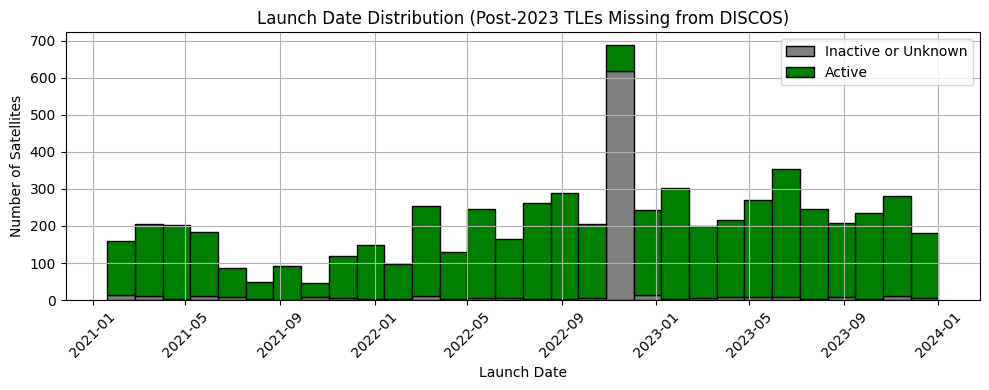

In [ ]:
# post_t_missing["LAUNCH_DATE"] = pd.to_datetime(post_t_missing["LAUNCH_DATE"], errors="coerce")
# post_t_missing["ACTIVE"] = post_t_missing["ACTIVE"].fillna(0).astype(bool)

# # Split into active and inactive
# active_dates = post_t_missing[post_t_missing["ACTIVE"]]["LAUNCH_DATE"].dropna()
# inactive_dates = post_t_missing[~post_t_missing["ACTIVE"]]["LAUNCH_DATE"].dropna()

# # Plot
# plt.figure(figsize=(10, 4))
# plt.hist([inactive_dates, active_dates], bins=30, stacked=True,
#          label=["Inactive or Unknown", "Active"], color=["gray", "green"], edgecolor="black")

# plt.title("Launch Date Distribution (Post-2023 TLEs Missing from DISCOS)")
# plt.xlabel("Launch Date")
# plt.ylabel("Number of Satellites")
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# def objclass2int(objclass):
#     mapping = {
#     # Main types
#     "Payload": 1,
#     "Rocket Body": 2,
#     "Debris": 3,
#     "Other": 4,

#     # Payload variants
#     "Payload Debris": 3,
#     "Payload Fragmentation Debris": 3,
#     "Payload Mission Related Object": 1,  # could argue for 4 instead

#     # Rocket variants
#     "Rocket Debris": 3,
#     "Rocket Fragmentation Debris": 3,
#     "Rocket Mission Related Object": 2,  # could also be "Other"
    
#     # Other junk
#     "Other Mission Related Object": 4,
#     "Other Debris": 3,
    
#     # Unknown fallback
#     "Unknown": 0 }
#     return mapping.get(objclass, np.nan)

# dmass = []
# dradius = []
# dobj = []

# for satid in tle_satnos:
#     match = discos_df[discos_df["satno"] == satid]
#     if not match.empty:
#         row = match.iloc[0]
#         dmass.append(row["mass"] if pd.notna(row.get("mass")) else 0)
#         if pd.notna(row.get("xSectAvg")):
#             dradius.append(np.sqrt(row["xSectAvg"] / np.pi))
#         else:
#             dradius.append(np.nan)
        
#         #CHECK
#         objclass_val = row.get("objectClass")
#         if objclass_val is None:
#             print(f"Missing objectClass for NORAD {satid}")
#         # print("not None")
            
#         dobj.append(objclass2int(row.get("objectClass")))
#     elif satid in [53239, 54216]:  # special Chinese payloads
#         dmass.append(0)
#         dradius.append(np.nan)
#         dobj.append(1)
#     else:
#         dmass.append(0)
#         dradius.append(np.nan)
#         dobj.append(np.nan)
#         missing_satnos = np.append(missing_satnos, satid)
        
# dobj = np.array(dobj)
# dmass = np.array(dmass)
# dradius = np.array(dradius)


In [ ]:
# num_nan_dobj = np.isnan(dobj).sum()
# print(num_nan_dobj)

17561


In [ ]:
# # Already defined:
# # tle_data            # your main TLE DataFrame (filtered & deduped)
# # dmass, dradius, dobj  # arrays from your matching loop
# # tle_satnos          # np.array of NORAD_CAT_ID from tle_data

# R_EARTH_KM = 6378.137

# def datetime_to_julian(dates):
#     return dates.astype("datetime64[ns]").view("int64") / 86400000000000 + 2440587.5

# launch_julian = datetime_to_julian(tle_data["LAUNCH_DATE"])

# N = len(merged_df)
# zeros = np.zeros(N)
# nans = np.full(N, np.nan)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# owner_codes = le.fit_transform(merged_df["OWNER"].fillna("Unknown"))

# mat_sats = np.column_stack([
#     merged_df["SEMIMAJOR_AXIS"].values / R_EARTH_KM,
#     merged_df["ECCENTRICITY"].values,
#     np.deg2rad(merged_df["INCLINATION"].values),
#     np.deg2rad(merged_df["RA_OF_ASC_NODE"].values),
#     np.deg2rad(merged_df["ARG_OF_PERICENTER"].values),
#     np.deg2rad(merged_df["MEAN_ANOMALY"].values),
#     merged_df["BSTAR"].values,
#     dmass,
#     dradius,
#     zeros, zeros, zeros, zeros, zeros, nans,
#     launch_julian,
#     zeros, zeros, zeros,
#     zeros, zeros, zeros,
#     dobj, # type of payload
#     tle_satnos,
#     owner_codes
# ])


In [ ]:
# from scipy.io import loadmat

# mat_data = loadmat("2025.mat")
# mat_sats_matlab = mat_data["mat_sats"]  # replace with correct variable name if needed


In [ ]:
# print("MATLAB shape:", mat_sats_matlab.shape)
# print("Python shape:", mat_sats.shape)

# mat_sats[0]
# # le.classes_[60]

# row_index = np.where(mat_sats[:, 23] == 5)[0]

# # Print the row if it exists
# if len(row_index) > 0:
#     print("Row index:", row_index[0])
#     print("Row values:", mat_sats[row_index[0]])


MATLAB shape: (20622, 24)
Python shape: (19607, 25)
Row index: 13042
Row values: [      1.3512       0.1842       0.5976       3.4881       1.0219
       5.5539       0.0004       0.              nan       0.
       0.           0.           0.           0.              nan
 2436279.5          0.           0.           0.           0.
       0.           0.              nan       5.          82.    ]


In [ ]:

# # Extract the ID column (index 23, 0-based) from both arrays
# ids_python = mat_sats[:, 23]
# ids_matlab = mat_sats_matlab[:, 23]

# # Find IDs in Python that are missing in MATLAB
# missing_ids = ids_python[~np.isin(ids_python, ids_matlab)]

# print(f"{len(missing_ids)} IDs in Python mat_sats are missing from MATLAB mat_sats_matlab.")
# if len(missing_ids) > 0:
#     print("Missing NORAD_CAT_IDs:", missing_ids)


3186 IDs in Python mat_sats are missing from MATLAB mat_sats_matlab.
Missing NORAD_CAT_IDs: [48547. 31440. 39552. ... 52014. 27769. 58664.]


In [ ]:
# mat_sats_matlab[0]

array([      1.3506,       0.1843,       0.5979,       1.3879,
             4.5266,       1.3879,       0.0009,       1.46  ,
             0.08  ,       0.    ,       0.    ,       0.    ,
             0.    ,       0.    ,          nan, 2436279.5   ,
             0.    ,       0.    ,       0.    ,       0.    ,
             0.    ,       0.    ,      10.    ,       5.    ])

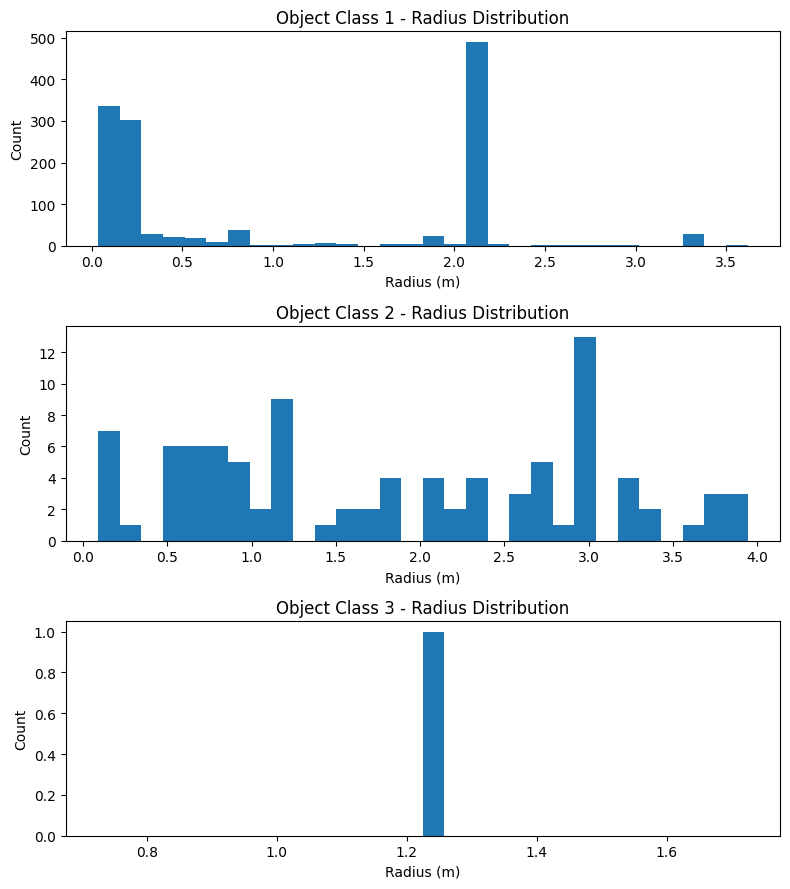

In [ ]:
# uobj = np.unique(dobj[~np.isnan(dobj)])  # skip NaNs

# plt.figure(figsize=(8, len(uobj)*3))
# for idx, obj_class in enumerate(uobj, 1):
#     plt.subplot(len(uobj), 1, idx)
#     plt.hist(dradius[np.where(dobj == obj_class)], bins=30)
#     plt.title(f"Object Class {int(obj_class)} - Radius Distribution")
#     plt.xlabel("Radius (m)")
#     plt.ylabel("Count")

# plt.tight_layout()
# plt.show()


### Next:
implement discosweb in python, then try to check 2023 and next Fast_MC2SSEM_population_v2.m

